# LAB 5: TOPIC CONVOLUTIONAL NEURAL NETWORKS
## Submission Deadline : 22nd October 2024 (TUESDAY) , 11:00 AM
### Submit your solution to this link : https://forms.gle/A8JbPa9FqfgdiUwc7


# CNNs

Lets see how they operate

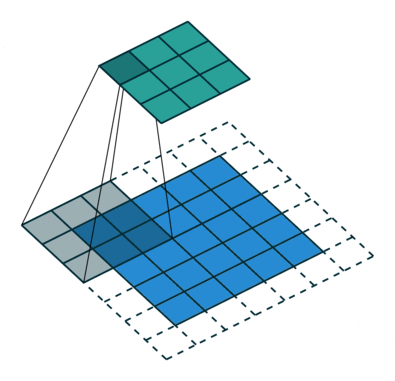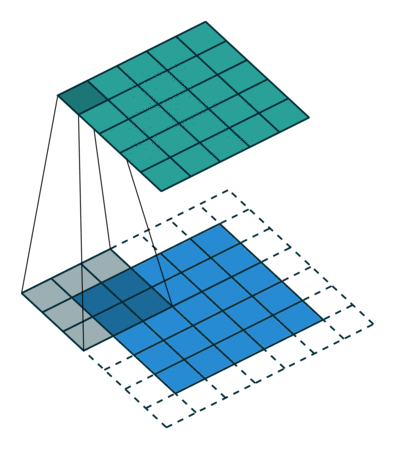

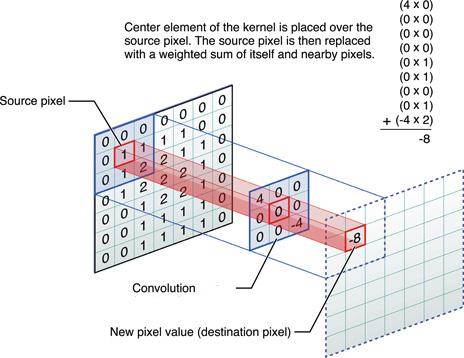

##Max Pooling
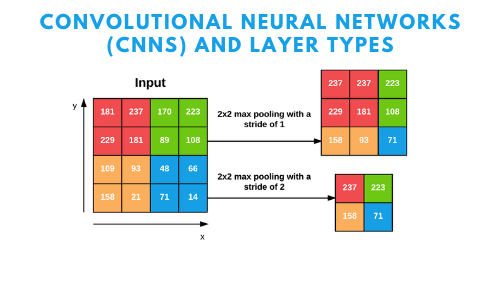

In [ ]:
import torch
from torch.nn import functional as F

In [ ]:
import torchvision
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif

--2024-10-18 13:17:46--  https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif
Resolving www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)... 141.201.2.14
Connecting to www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)|141.201.2.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264598 (258K) [image/gif]
Saving to: ‘lena_gray.gif’

lena_gray.gif       100%[===================>] 258.40K   396KB/s    in 0.7s    

2024-10-18 13:17:47 (396 KB/s) - ‘lena_gray.gif’ saved [264598/264598]



We show a basic convolution using a kernel on the image below. The image is a 512x512  image with 4 'channels' RGB and an alpha(opacity) channel. Basically each pixel has 4 values.

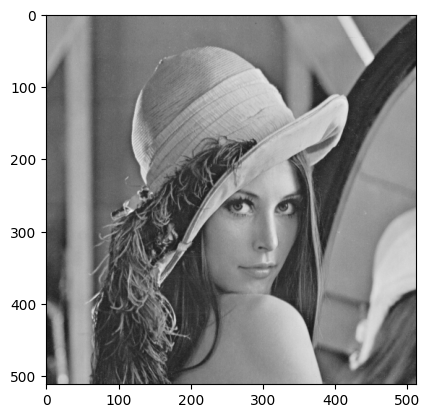

In [ ]:
img = Image.open('lena_gray.gif')
plt.imshow(img)

In [ ]:
img = torchvision.transforms.ToTensor()(img)
img.shape

torch.Size([1, 512, 512])

The weight matrix declared below is customised for the

In [ ]:
weight = [[1,0,-1],[2,0,-2],[1,0,-1]]
weight = torch.tensor(np.array(weight),dtype=torch.float).unsqueeze(0).unsqueeze(0)

The weights are shaped so since the convolution operation done by `torch.nn.functional.conv2d` requires it to be in the form `(out_channels, in_channels, F,F)` size. It is important to understand what we mean by channels here. A normal image you take using a camera has RGB channels, forming 3 channels. When you apply a convolutional kernel/filter over the image it produces a single new feature map. Hence out_channels means the number of convolutional filters we are applying. We discuss the unsqueeze function later too, it just adds an extra dimension for complying to the requirements.

In [ ]:
weight.shape

torch.Size([1, 1, 3, 3])

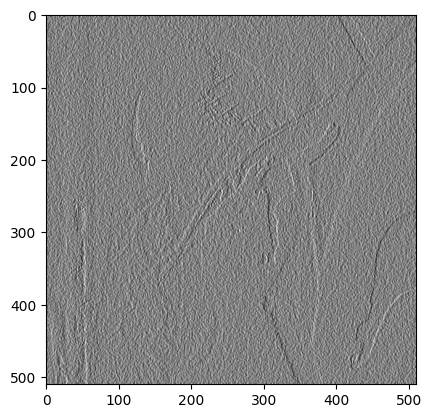

In [ ]:
plt.imshow(F.conv2d(input = img, weight=weight,).numpy().squeeze(), cmap= 'gray')

MNIST with CNNs

In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms

In [ ]:
trainset = MNIST("./temp/", train=True, download=True)
testset = MNIST("./temp/", train=False, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17631282.96it/s]


Extracting ./temp/MNIST/raw/train-images-idx3-ubyte.gz to ./temp/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 489093.30it/s]


Extracting ./temp/MNIST/raw/train-labels-idx1-ubyte.gz to ./temp/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3783869.28it/s]


Extracting ./temp/MNIST/raw/t10k-images-idx3-ubyte.gz to ./temp/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4838843.98it/s]

Extracting ./temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./temp/MNIST/raw



In [ ]:
train_x = trainset.data[:50000].float()/255  #we dont reshape the image into (1,784) since conv2d uses the 2D image itself as input
train_y = trainset.targets[:50000]

validation_x = trainset.data[50000:55000].float()/255
validation_y = trainset.targets[50000:55000]

test_x = testset.data/255
test_y = testset.targets

Convolution size formula


$$W_{out} = \lfloor\frac{W+2P-K}{S} \rfloor +1 $$

where
W = input image width \\
K = kernel size \\
P = padding size


`in_features` for self.lin1 has been set as 4x4x10 since the previous layer has `out_channels = 10` and the image will be of size 4x4. We are essentially flattening the image and applying linear layers on it to classify into the 10 classes. HW: Try working out how the image size became 4*4.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

Convolution layers essentially come with three parts
1. **Convolution Operation** : `nn.Conv2d` method of Pytorch uses the `F.conv2d` we used before as a backend to implement the convolution operation
2. **Pooling** : Pooling is a downsampling operatio in which, from the convoluted image we take a kxk patch (k is the pooling kernel size) and pick the maximum element from it if its MaxPooling or do Average of the elements in the patch if its Average pooling and so on.
3. **Activation function** : The activation function from the previous lab session, used to bring non linearities into the network. Without ReLUs we would be just be matrix multiplying all the layers, essentially making the intermediate layers useless.

In [ ]:
class CNNModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 5, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 5, stride = 1)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.lin1 = nn.Linear(in_features= 4*4*10,out_features = 100)
    self.lin2 = nn.Linear(100,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = torch.flatten(x,1)
    x = F.relu(self.lin1(x))
    x = self.lin2(x)
    return x

The following lines are necessary since nn.Conv2d expects the image input to be of dimensions $(N, C_{in},H,W)$. Where $N$ is the batch size, $C_{in}$ is the number of input channels, in our case its 1 (since MNIST is a grayscale dataset) and $H, W$ are the dimensions of the image

In [ ]:
train_x = train_x.unsqueeze(1)
validation_x = validation_x.unsqueeze(1)
test_x = test_x.unsqueeze(1)

We can see that `unsqueeze(dim)` will insert a dummy dimension at dim=1, and makes the dataset into a shape acceptable for the CNN Classifier


In [ ]:
train_x.shape

torch.Size([50000, 1, 28, 28])

When training on the GPU make sure that the data and the model are on the GPU by using `.cuda()` calls

In [ ]:
!nvidia-smi


Fri Oct 18 13:18:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
train_x = train_x.cuda()
train_y = train_y.cuda()

validation_x = validation_x.cuda()
validation_y = validation_y.cuda()

test_x = test_x.cuda()

In [ ]:
model = CNNModel().cuda()

The training loop itself will remain mostly unchanged from the last lab

In [ ]:
batch_size = 128
num_epochs = 20
num_batches_per_train_epoch = train_x.shape[0] // batch_size
num_batches_validation = validation_x.shape[0] // batch_size

In [ ]:
import torch.optim as optim
import torch.nn.init as init

In [ ]:
def get_accuracy(predictions, targets):
  length = len(predictions)
  correct = 0
  for idx in range(length):
    if predictions[idx] == targets[idx]: correct +=1

  return (correct/length) * 100

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

We need to change the `.numpy()` calls in the training loop into `.detach().cpu().numpy()` since the tensors are on the GPU and numpy operations are done on the CPU, here to bring a tensor from GPU to CPU calling detach().cpu() becomes necessary


In [ ]:
# Train the model

epoch_loss = 0
losses_at_each_epoch = list()
train_accuracies = list()
validation_accuracies = list()

# Forward pass -> Backward pass -> Weight update

for epoch in range(num_epochs):
  epoch_loss = 0

  model.train()
  train_preds = list()
  train_targets = list()


  # Train one epoch
  for batch_idx in range(num_batches_per_train_epoch):
    optimizer.zero_grad()  # This line is necessary to flush out the gradients of the previous batch.

    input = train_x[batch_idx*batch_size: (batch_idx+1)*batch_size] # Slice out batch_size amount of the training data
    output = model(input)
    target_out = train_y[batch_idx*batch_size: (batch_idx+1)*batch_size]
    preds = torch.argmax(output, dim=1)

    train_preds +=(list(preds.detach().cpu().numpy()))
    train_targets+=(list(target_out.detach().cpu().numpy()))
    batch_loss = criterion(output, target_out)

    batch_loss.backward()
    optimizer.step()
    epoch_loss += batch_loss
  losses_at_each_epoch.append(epoch_loss.detach().cpu() / batch_size)

  # Switch model to eval mode since we do not want to update our weights using test/val set images! They are for measuring performance only
  model.eval()
  # Training Performance at the end of epoch

  val_preds = list()
  val_targets = list()

  for batch_idx in range(num_batches_validation):
    input = validation_x[batch_idx*batch_size: (batch_idx+1)*batch_size]
    output = model(input)
    target_out = validation_y[batch_idx*batch_size: (batch_idx+1)*batch_size]
    # preds = torch.argmax(output, dim=1)
    preds = torch.max(output, 1)[1]


    val_preds += (list(preds.detach().cpu().numpy()))
    val_targets+=(list(target_out.detach().cpu().numpy()))

  train_accuracies.append(get_accuracy(train_preds, train_targets))
  validation_accuracies.append(get_accuracy(val_preds, val_targets))

  # if epoch % 10 == 0:
  print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
              epoch, losses_at_each_epoch[-1], train_accuracies[-1], validation_accuracies[-1]))


Epoch  0 : Train Loss 6.907401 , Train acc 26.085737, Valid acc 49.358974
Epoch  1 : Train Loss 3.401423 , Train acc 72.401843, Valid acc 83.092949
Epoch  2 : Train Loss 1.242390 , Train acc 87.758413, Valid acc 88.100962
Epoch  3 : Train Loss 0.960605 , Train acc 90.462740, Valid acc 90.264423
Epoch  4 : Train Loss 0.810178 , Train acc 91.901042, Valid acc 91.506410
Epoch  5 : Train Loss 0.708825 , Train acc 92.924679, Valid acc 92.407853
Epoch  6 : Train Loss 0.632556 , Train acc 93.741987, Valid acc 93.209135
Epoch  7 : Train Loss 0.572364 , Train acc 94.356971, Valid acc 93.810096
Epoch  8 : Train Loss 0.522704 , Train acc 94.781651, Valid acc 94.270833
Epoch  9 : Train Loss 0.480205 , Train acc 95.218349, Valid acc 94.771635
Epoch 10 : Train Loss 0.443609 , Train acc 95.578926, Valid acc 95.172276
Epoch 11 : Train Loss 0.412280 , Train acc 95.859375, Valid acc 95.532853
Epoch 12 : Train Loss 0.385132 , Train acc 96.153846, Valid acc 95.833333
Epoch 13 : Train Loss 0.361442 , Train

(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'Acc'))

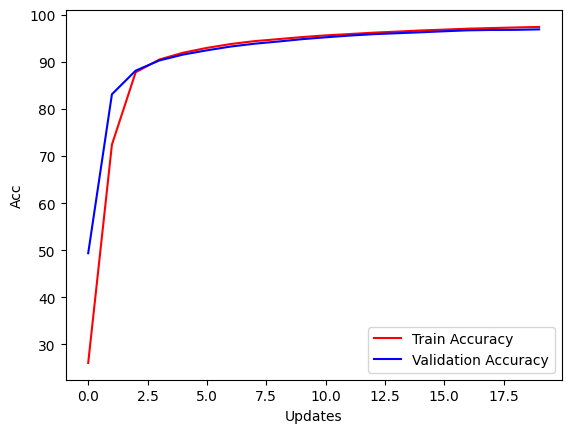

In [ ]:
import numpy as np


epoch = np.arange(len(train_accuracies))
plt.figure()
plt.plot(epoch, train_accuracies, 'r', epoch, validation_accuracies, 'b')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

In [ ]:
get_accuracy(torch.argmax(model(test_x),dim=1).detach().cpu().numpy(), test_y)

97.47

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
num_params = sum([np.prod(p.size()) for p in model_parameters])
num_params

19880

Much better than MLP based model with lesser training epochs as well, at a fraction of the number of parameters


# Fine tuning

When we finetune a network, we are essentially using a model which was trained on a larger extensive dataset to be used for a smaller sized 'finer' data. For e.g: We use a ResNet (which is a popular vision architecture) pre-trained on the IMAGENET-1k dataset. This dataset contains images of 1000 classes of objects with close to 1M images, and we are using that model for classifying a small custom dataset to differentiate between ants and bees.

The idea is that the model will have learnt some useful general characteristics of an image from the earlier extensive dataset, which would help in this simpler task.

We are adapting this part from the Pytorch tutorial on finetuning [here](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2024-10-18 13:19:34--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.238.238.82, 18.238.238.104, 18.238.238.114, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.238.238.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   255MB/s    in 0.2s    

2024-10-18 13:19:34 (255 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [ ]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [ ]:
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler
import time
import os
import copy

Remember the `torchvision.transforms` library we used? It comes in very handy when handling image data which needs to go through certain pre-processing steps like normalizing, resizing and even doing a Center crop.


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Note that we are using a dataloader and dataset class here to simplify the process of bringing images from the disk into the input tensors for our model.

1. Dataset : The `datasets.ImageFolder` method is used when you have the images of different classes present in discrete folders and the folder name itself is the image label. This is the case here hence we can use the method as is. We can override it as well to make custom datasets

2. Dataloader : They simplify our training loop by batching the images of the dataset, shuffling them and optimizing their memory usage. Now getting a batch of images and labels are as simple as doing `img,label = next(dataloader)`. Remember that dataloader is an iterator type

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}


In [ ]:
dataset_sizes

{'train': 244, 'val': 153}

In [ ]:
class_names = image_datasets['train'].classes
class_names

['ants', 'bees']

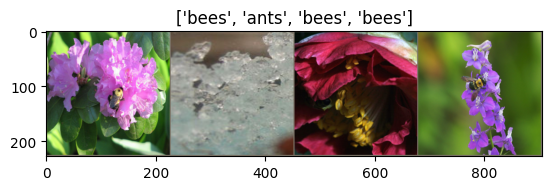

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0)) #This line is necessary because a pytorch image tensor is supposed to be of (C,H,W) dimensions but matplotlib expects the normal (H,W,C)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

`model.state_dict()` method returns a dictionary with the keys as layer_names and the values being the actual weights of the corresponding layer

In [ ]:
model.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'lin1.weight', 'lin1.bias', 'lin2.weight', 'lin2.bias'])

We show here a different version of the same training loop

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model weights for the model which has the highest acc.
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

We introduce something called a scheduler below. Schedulers manage the learning rate of our architecture. It is usually favourable to decay your learning rate as training progresses, since we want the model to converge to a solution. There are various ways to do this, exponential decay, step decay, cosine annealing etc. HW: Find out the equations for the types of schedulers listed above

In [ ]:
model_ft = models.resnet18(weights="IMAGENET1K_V1") #Load the pretrained model
num_ftrs = model_ft.fc.in_features   # fc stands for the final fully connected layer for the Resnet which will have out_features = 1000,
                                     # we take the input features it has and make a change to the Linear layer to have 2 outputs (bees,ants)
                                     # instead of 1000 earlier

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]


In [ ]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

We train all the model weights including conv layers, for the new dataset

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5343 Acc: 0.6844
val Loss: 0.2078 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.4775 Acc: 0.7828
val Loss: 0.4014 Acc: 0.8562

Epoch 2/24
----------
train Loss: 0.4438 Acc: 0.8115
val Loss: 0.1808 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.5533 Acc: 0.7336
val Loss: 0.2700 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.4302 Acc: 0.8197
val Loss: 0.3951 Acc: 0.8431

Epoch 5/24
----------
train Loss: 0.5478 Acc: 0.7910
val Loss: 0.2035 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.4057 Acc: 0.8279
val Loss: 0.3179 Acc: 0.8954

Epoch 7/24
----------
train Loss: 0.3541 Acc: 0.8443
val Loss: 0.2968 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.4359 Acc: 0.8443
val Loss: 0.3087 Acc: 0.9020

Epoch 9/24
----------
train Loss: 0.2711 Acc: 0.8852
val Loss: 0.3037 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.3568 Acc: 0.8361
val Loss: 0.3218 Acc: 0.8954

Epoch 11/24
----------
train Loss: 0.2667 Acc: 0.8893
val Loss: 0.2652 Acc: 0.9150

Ep

Another thing we can do, which is computationally cheaper is to freeze the conv layers and use them as a feature extractor, and only learn the weights for the final fully connected layers which actually do the classification. Notice that the training times are quite similar here, this shows how less the weight overhead of conv layers are as compared to MLPs. When we train deeper Nets the time difference will be significant

In [ ]:
model_conv = torchvision.models.resnet18(weights="IMAGENET1K_V1")
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5935 Acc: 0.6639
val Loss: 0.2834 Acc: 0.8824

Epoch 1/24
----------
train Loss: 0.4915 Acc: 0.7664
val Loss: 0.2186 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.4046 Acc: 0.8238
val Loss: 0.2165 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.5390 Acc: 0.7787
val Loss: 0.7055 Acc: 0.7582

Epoch 4/24
----------
train Loss: 0.5568 Acc: 0.7582
val Loss: 0.2160 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.5394 Acc: 0.7623
val Loss: 0.2178 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.4215 Acc: 0.8279
val Loss: 0.2545 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.3711 Acc: 0.8279
val Loss: 0.2023 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3858 Acc: 0.8320
val Loss: 0.2294 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.4019 Acc: 0.8074
val Loss: 0.2018 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3172 Acc: 0.8607
val Loss: 0.2328 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3320 Acc: 0.8484
val Loss: 0.2034 Acc: 0.9477

Ep

**Exercise 1 (Graded): Fashion Item Classification with CNN**
**Objective:** Build a CNN model to classify images of various fashion items from the Fashion MNIST dataset.

**Dataset:** Fashion MNIST is a dataset of 28x28 grayscale images of clothing items from 10 different categories. It contains 60,000 training images and 10,000 test images.

*This task will help you gain hands-on experience with CNNs and image classification using the Fashion MNIST dataset. You can use PyTorch/TensorFlow/Keras to implement the task. Feel free to explore different CNN architectures and techniques to improve your model's performance.*

**Dataset Link:** [Dataset Link](https://www.kaggle.com/datasets/zalando-research/fashionmnist)